<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


In [3]:
df.shape

(45, 5)

###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [4]:
df = df[['Pu239', 'Pu240']]

In [5]:
df.shape

(45, 2)

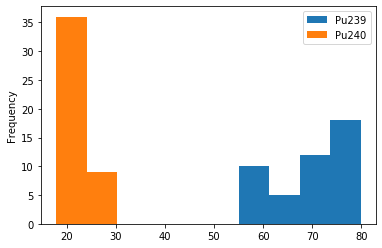

In [6]:
df.plot.hist();

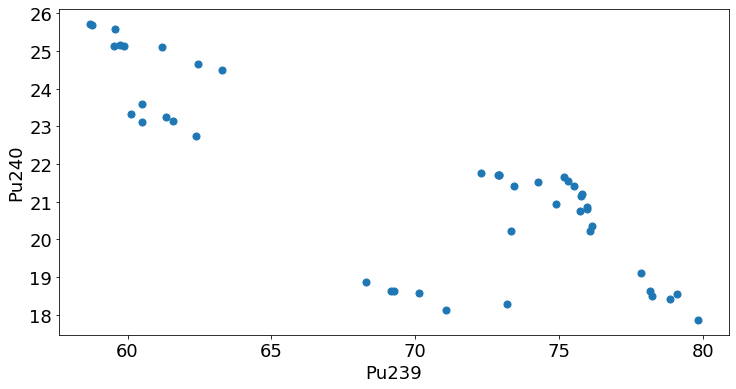

In [7]:
ax = df.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(12,6), s=50)
plt.xlabel("Pu239", fontsize=18)
plt.ylabel("Pu240", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [8]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [9]:
km.cluster_centers_

array([[60.63393333, 24.38753333],
       [71.57316667, 19.97391667],
       [76.593     , 20.19483333]])

In [10]:
km.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0], dtype=int32)

In [11]:
km.predict(df)

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0], dtype=int32)

In [12]:
df['cluster'] = km.labels_
df.head()

,Pu239,Pu240,cluster
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,2
4,73.317,20.223,1


In [13]:
km.cluster_centers_

array([[60.63393333, 24.38753333],
       [71.57316667, 19.97391667],
       [76.593     , 20.19483333]])

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [14]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    km.cluster_centers_,
    columns=["Pu239", "Pu240"]
)
centroids

,Pu239,Pu240
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


<Figure size 504x504 with 0 Axes>

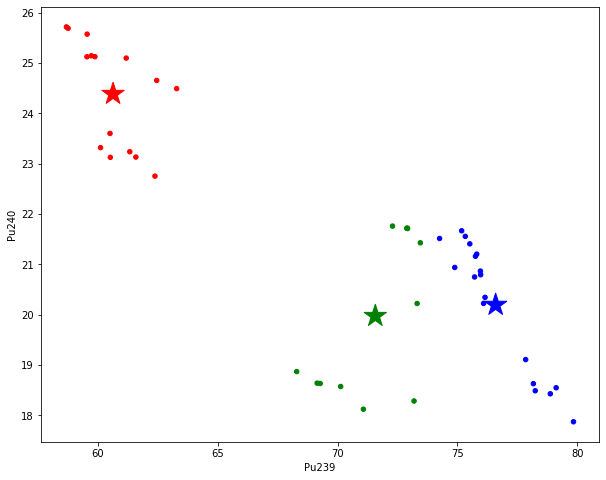

In [15]:
plt.figure(figsize=(7,7))

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
);

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [16]:
X = df.loc[:, ['Pu239', 'Pu240']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [17]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
df['cluster'] = km.labels_
df.head()

,Pu239,Pu240,cluster,color
0,75.804,21.204,2,blue
1,75.515,21.408,2,blue
2,75.175,21.668,2,blue
3,78.872,18.428,1,blue
4,73.317,20.223,2,green


In [19]:
entroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239", "Pu240"]
)
centroids

,Pu239,Pu240
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


<Figure size 504x504 with 0 Axes>

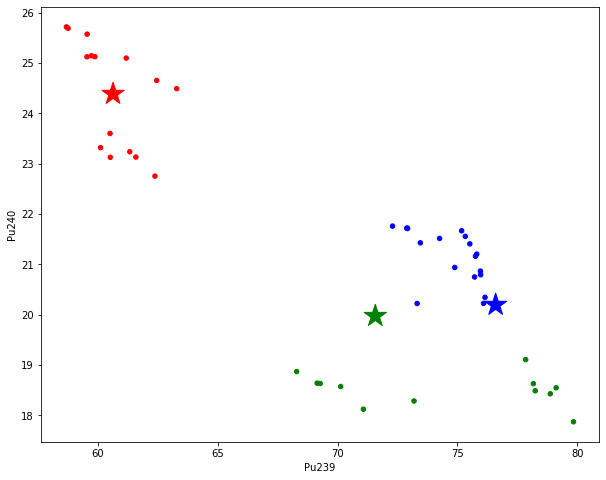

In [20]:
plt.figure(figsize=(7,7))

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km.labels_)

0.6332174776862322